# Logistic 回归

sigmoid 函数:

$$
S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}
$$

Logistic 回归模型的条件概率分布:

$$
P(Y=1|x)=\frac{exp(\mathbf w^T \mathbf x + b)}{1+exp(\mathbf w^T \mathbf x + b)} =\pi(\mathbf x)\\
P(Y=0|x)=\frac{1}{1+exp(\mathbf w^T \mathbf x + b)}=1-\pi(\mathbf x)
$$

似然函数为:

$$
\prod_{i=1}^N\left(\pi(\mathbf x_i\right)^{y_i}\left(1-\pi(x_i)\right)^{1-y_i}
$$

对数似然函数为:

$$
\begin{aligned}
\mathcal L(\mathbf w)&=\sum_{i=1}^N\{y_ilog\pi(\mathbf x_i)+(1-y_i)log(1-\pi(\mathbf x_i))\} \\
&=\sum_{i=1}^N\{y_ilog\frac{\pi(\mathbf x_i)}{1-\pi(\mathbf x_i)} + log(1-\pi(\mathbf x_i))\} \\
&=\sum_{i=1}^N\{y_i(\mathbf w^T\mathbf x_i)-log(1+exp(\mathbf w^T\mathbf x_i))\}
\end{aligned}
$$

求$\mathcal L(\mathbf w)$的最大值得到$\mathbf w^*$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import math
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib.colors import Normalize

%matplotlib inline

N, M = 100, 2
X, y = make_classification(n_samples=N, n_features=2, n_repeated=0, n_informative=2, n_redundant=0)

cmap = matplotlib.cm.Paired

In [2]:
df = pd.DataFrame(np.c_[X, y], columns=['feature_{:.0f}'.format(i+1) for i in range(M)] + ['label'])
df.head()

,feature_1,feature_2,label
0,-0.927040,1.184022,0.0
1,-2.417012,-2.021395,0.0
2,-1.373956,1.381693,0.0
3,-2.092983,3.167385,0.0
4,-0.989421,2.179654,0.0


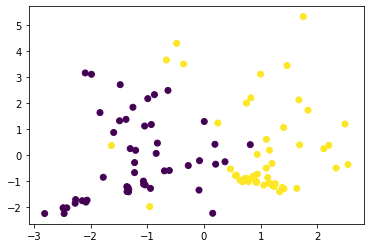

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
X_train = np.c_[X_train, np.ones((X_train.shape[0], 1))]
X_test = np.c_[X_test, np.ones((X_test.shape[0], 1))]

X_train[:2]

array([[ 0.87308667, -0.81105337,  1.        ],
       [-1.98300473,  3.11687398,  1.        ]])

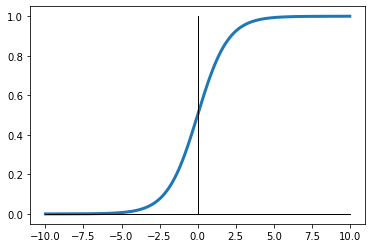

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sx = np.linspace(-10, 10, 1000)
sy = sigmoid(sx)
plt.plot(sx, sy, lw=3)
plt.plot([-10, 10], [0, 0], c='k', lw=1)
plt.plot([0, 0], [0, 1], c='k', lw=1)

In [6]:
def predict(w, X):
    yhat = [1 if v < 0.5 else 0 for v in sigmoid(X@w)]
    return yhat

In [7]:
def cost(w, X, y):
    yhat = predict(w, X)
    return 1-accuracy_score(y, yhat)

w = np.random.rand(X_train.shape[1], 1)
cost(w, X_train, y_train)

0.75

使用梯度下降法求最佳参数

令$\frac{\partial \mathcal L(\mathbf w)}{\partial \mathbf w} = 0$得到:

$$
d \mathbf w = \sum_{i=1}^N\left(y_i-\frac{1}{1+exp(\mathbf w^T\mathbf x_i)}\right) \mathbf x_i
$$

Text(0.5, 1.0, 'final acc = 0.90')

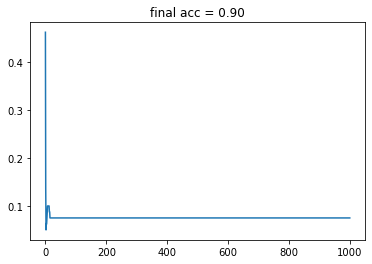

In [8]:
costs = []
def train(X, y, maxiter=1000, alpha=0.01):
    w = np.random.rand(X.shape[1], 1)
    y = y.reshape(-1, 1)
    for epoch in range(maxiter):
        yhat = X@w
        dw = X.T@(y - 1/(1+np.exp(yhat)))
        w -= alpha*dw
        costs.append(cost(w, X, y))
    return w

w = train(X_train, y_train)
plt.plot([i for i in range(len(costs))], costs)
ypred = predict(w, X_test)
acc = accuracy_score(ypred, y_test)
plt.title('final acc = {:.2f}'.format(acc))

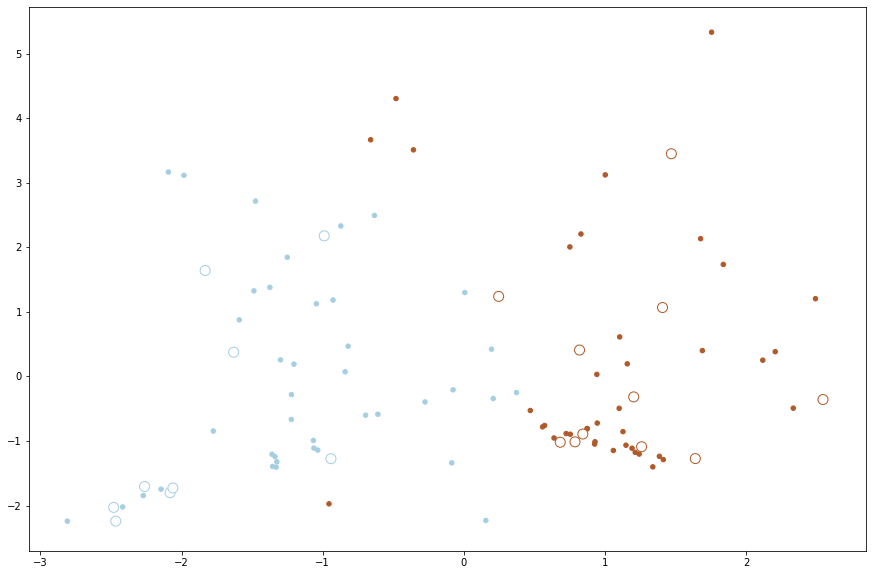

In [9]:
plt.figure(figsize=(15, 10))
norm = Normalize(vmin=0, vmax=1)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=cmap, c=y_train, s = 20)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', fc='w', s=100, ec=[cmap(v) for v in norm(ypred)])

使用SGD求最佳参数

Text(0.5, 1.0, 'final acc = 0.90')

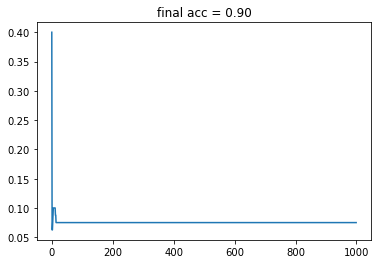

In [10]:
costs = []
def train_sgd(X, y, maxiter=10, alpha=0.01):
    w = np.random.rand(X.shape[1], 1)
    for epoch in range(maxiter):
        for _ in range(X.shape[0]):
            i = np.random.randint(0, X.shape[0])
            xi = X[i].reshape(-1, 1)
            yi = y[i]
            yhat = (w.T@xi).item(0)
            dw = (yi-1/(1+math.exp(yhat)))*xi
            w -= dw*alpha
            costs.append(cost(w, X, y))
    return w
    
    
w = train(X_train, y_train)
ypred = predict(w, X_test)
acc = accuracy_score(ypred, y_test)
plt.plot([i for i in range(len(costs))], costs)
plt.title('final acc = {:.2f}'.format(acc))

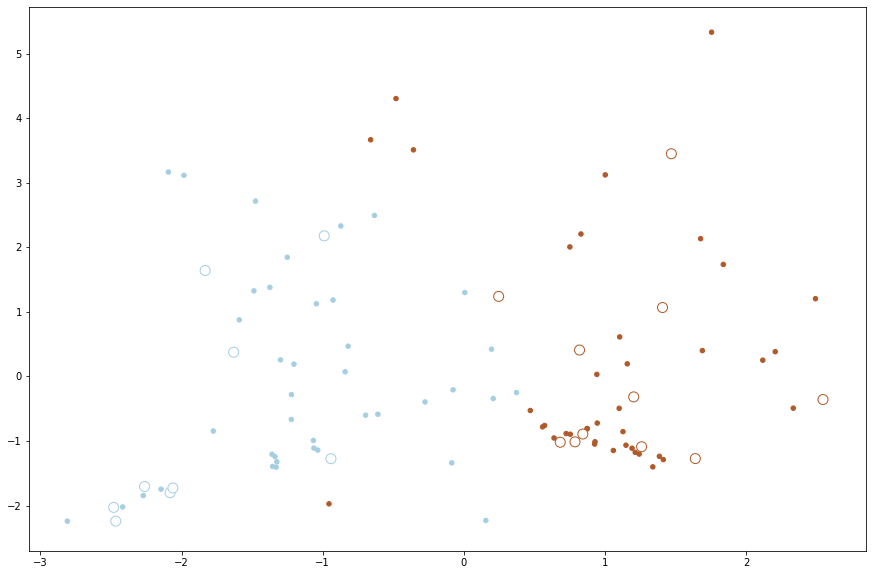

In [11]:
plt.figure(figsize=(15, 10))
norm = Normalize(vmin=0, vmax=1)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=cmap, c=y_train, s = 20)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', fc='w', s=100, ec=[cmap(v) for v in norm(ypred)])

# 最大熵模型

假设模型是概率分布$P(Y|X)$,给定训练集$T=\{(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)\}$的经验联合分布和经验边缘分布分别是:

$$
\tilde P(X=x, Y=y)=\frac{count(X=x, Y=y)}{N} \\
\tilde P(X=x)=\frac{count(X=x)}{N}
$$

用特征函数$f(x,y)$表示输入$x$和输出$y$之间的某一事实,其定义为:

$$
f(x, y)=
\begin{cases}
1, & x与y满足某一事实\\
0, & otherwise
\end{cases}
$$

特征函数$f(x, y)$关于经验分布$\tilde P(X,Y)$的期望值:

$$
E_{\tilde P}(f) = \sum_{x, y}\tilde P(x, y)f(x, y)
$$

特征函数$f(x, y)$关于模型$P(Y|X)$的期望值:

$$
E_P(f)=\sum_{x, y}\tilde P(x)P(y|x)f(x, y)
$$


假设两个期望相等,即:

$$
E_P{f}=E_{\tilde P}(f)
$$

或者

$$
\sum_{x,y}\tilde P(x)P(y|x)f(x, y) = \sum_{x,y}\tilde P(x, y)f(x, y)
$$

最大熵模型即在条件概率分布$P(Y|X)$上的条件熵最大:

$$
\underset {P\in C} H(P)=-\sum_{x,y}\tilde P(x)P(y|x)log P(y|x) \\
s.t. E_P(f_i)=E_{\tilde P}(f_i), \\
\sum_y P(y|x)=1
$$

其中$C$是所有满足约束条件的模型集合

按照极大似然估计写成最大熵更一般的形式, 即是由以下条件概率分布表示的分类模型.可以用于二分类或者多分类:

$$
P_w(y|x)=\frac{1}{Z_w(x)}exp\left(\sum_{i=1}^nw_if_i(x, y)\right)
$$

其中,

$$
Z_w(x)=\sum_y exp\left(\sum_{i=1}^nw_if_i(x, y)\right)
$$

这里$x \in \mathcal R^n$为输入,$y \in \{1, 2, \cdots, K\}$为输出,$w \in \mathcal R^n$为权值向量,$f_i(x, y), i=1, 2, \ldots, n$为任意特征值函数.



特征函数$f(x, y)$关于经验分布$\tilde P(Y|X)$

## 改进的尺度迭代法(improved iterative scaling, IIS)

输入: 特征函数$f_1, f_2,\ldots, f_n$;经验分布$\tilde P(X, Y)$,模型$P_w(y|x)$

输出: 最优参数$w^*$;最优模型$P_{w^*}$;

1. 初始化$w_i=0$
2. 对每个$i \in \{1, 2, \ldots, n\}$
    1. 令$\delta_i$ 是方程
        $$
            \sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))=E_{\tilde P}(f_i) \\
            写成 g(\delta_i^*)=0
        $$
        
       的解, 其中$f^\#(x,y)=\sum_{i=1}^nf_i(x, y)$
    2. 更新$w_i$的值:$w_i = w_i+\delta_i$
3. 如果不是所有的$w_i$都已经收敛,重复(2)

如果$f^\#(x, y)$是常数$M$,因为$\delta_i$是$\sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))-E_{\tilde P}(f_i)=0$的解，所以：

$$
\begin{aligned}
& \sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))-E_{\tilde P}(f_i)=0 \\
& \Rightarrow exp(\delta_if^\#(x, y))E_P(f_i)-E_{\tilde P}(f_i)=0 \\
& \Rightarrow exp(\delta_if^\#(x, y)) = \frac{E_{\tilde P}(f_i)}{E_P(f_i)} \\
& \Rightarrow \delta_if^\#(x, y)= log\frac{E_{\tilde P}(f_i)}{E_P(f_i)} \\
& \Rightarrow \delta_i=\frac{1}{M}log\frac{E_{\tilde P}(f_i)}{E_P(f_i)}
\end{aligned}
$$

否则通过牛顿法迭代求$\delta_i^*$,即:

$$
\delta_i^{(k+1)} = \delta_i^{(k)}-\frac{g(\delta_i^{(k)})}{g'(\delta_i^{(k)})}
$$

In [12]:
import collections
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']]

MaxEntropy的EP是特征函数$f(x, y)$关于经验分布$\tilde P(X,Y)$的期望值:

$$
E_{\tilde P}(f) = \sum_{x, y}\tilde P(x, y)f(x, y)
$$

In [13]:
class MaxEntropy:
    def __init__(self, EPS=0.001):
        self.samples = []
        self.y = set()
        self.N = 0 # 样本数量
        self.n = 0 # 不同的(x, y)的数量
        self.w = [] # parameter
        self.eps = EPS
        self.lastw = [] # last parameter
        self.countXy = collections.defaultdict(int) # count of (x, y)
        self.xyId = {} # id of (x, y)
        self.idXy = {} # (x, y) of id
        self.EP = [] # 样本分布的期望特征值
        self.C = 0 # 最大特征数量
        
    def load_data(self, dataset):
        self.samples = dataset.copy()
        self.N = len(dataset)
        self.C = max([len(sample)-1 for sample in self.samples])
        self.y = set()
        self.countXy = collections.defaultdict(int)
        self.xyId = {} # id of (x, y)
        self.idXy = {} # (x, y) of id
        
        for items in self.samples:
            X, y = items[1:], items[0]
            self.y.add(y)
            for x in X:
                self.countXy[(x, y)] += 1
        
        n = len(self.countXy)
        self.n = n
        self.w = np.zeros(n)
        self.lastw = np.ones(n)
        
        self.EP = np.zeros(n)
        for i, xyc in enumerate(self.countXy.items()):
            xy, c = xyc
            self.EP[i] = c/self.N
            self.xyId[xy] = i
            self.idXy[i] = xy
        
        
enc = MaxEntropy()
enc.load_data(dataset)

计算$Z_w(x)=\sum_y exp\left(\sum_{i=1}^nw_if_i(x, y)\right)$

In [14]:
def zwx(enc, X):
    zx = 0
    for y in enc.y:
        ss = np.sum([enc.w[enc.xyId[(x, y)]] for x in X if enc.countXy[(x, y)]>0])
#         for x in X:
#             print(ss, enc.countXy[(x, y)], x,y)
        zx += np.exp(ss)
    return zx

zwx(enc, dataset[0][1:])

2.0

计算$P_w(y|x)=\frac{1}{Z_w(x)}exp\left(\sum_{i=1}^nw_if_i(x, y)\right)$

In [15]:
def model_pyx(enc, y, X):
    zx = zwx(enc, X)
    ss = np.sum([enc.w[enc.xyId[(x, y)]] for x in X if enc.countXy[(x, y)] > 0])
    return np.exp(ss)/zx

model_pyx(enc, dataset[0][0], dataset[0][1:])    

0.5

特征函数$f(x, y)$关于模型$P(Y|X)$的期望值:

$$
E_P(f)=\sum_{x, y}\tilde P(x)P(y|x)f(x, y)
$$

In [16]:
def model_ep(enc, index):
    x, y = enc.idXy[index]
    ep = 0
    for sample in enc.samples:
        if x not in sample:
            continue
        pyx = model_pyx(enc, y, sample)
        ep += pyx/enc.N
    
    return ep

model_ep(enc, 0)

0.17857142857142855

判断是否完全收敛

In [17]:
def model_converge(enc):
    return all([v < enc.eps for v in enc.lastw-enc.w])

model_converge(enc)

False

训练模型

如果$f^\#(x, y)$是常数,则$\delta_i$可表示为:

$$
\delta_i=\frac{1}{M}log\frac{E_{\tilde P}(f_i)}{E_P(f_i)}
$$


In [18]:
def train(enc, maxiter=1000):
    for epoch in range(maxiter):
        enc.lastw[:] = enc.w # or enc.lastw = np.array(enc.w), can't be enc.lastw = enc.w[:]
        for i in range(enc.n):
            ep = model_ep(enc, i)
            enc.w[i] += math.log(enc.EP[i]/ep)/enc.C
        if model_converge(enc):
            break
train(enc)

$$
P_w(y|x) = \frac{1}{Z_w(x)}exp\left(\sum_{i=1}^nw_if_i(x, y)\right)
$$

这里取
$$
f_i(x, y) = 1
$$

In [19]:
def predict(enc, X):
    z = zwx(enc, X)
    result = {}
    for y in enc.y:
        ss = np.sum([enc.w[enc.xyId[(x, y)]] for x in X if enc.countXy[(x, y)] > 0])
        pyx = math.exp(ss)/z
        result[y] = pyx
    
    return result

predict(enc, ['overcast', 'mild', 'high', 'FALSE'])

{'no': 4.776792073973857e-07, 'yes': 0.9999995223207926}

## 梯度下降

$$
\frac{\partial f(w)}{\partial w_i} = \sum_{x,y}\tilde P(x)P_w(y|x)f_i(x, y)-E_{\tilde P}(f_i), i=1, 2, \ldots, n
$$

In [20]:
def train(enc, maxiter=1000):
    for epoch in range(maxiter):
        enc.lastw[:] = enc.w # or enc.lastw = np.array(enc.w), can't be enc.lastw = enc.w[:]
        for i in range(enc.n):
            ep = model_ep(enc, i)
            dw = ep - enc.EP[i]
            X, y = enc.idXy[i]
            g = model_pyx(enc, y, X)
            enc.w[i] -= dw/g
#             enc.w[i] += math.log(enc.EP[i]/ep)/enc.C
        if model_converge(enc):
            break

enc = MaxEntropy()
enc.load_data(dataset)
train(enc)
predict(enc, ['overcast', 'mild', 'high', 'FALSE'])

{'no': 6.096523003380522e-08, 'yes': 0.9999999390347699}

## 牛顿法

$$
\delta_i^{(k+1)} = \delta_i^{(k)}-\frac{g(\delta_i^{(k)})}{g'(\delta_i^{(k)})}
$$

其中：

$$
g(\delta_i) = \sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))-E_{\tilde P}(f_i)
$$

$$
g'(\delta_i^{(k)}) = f^\#(x, y)\sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))
$$


$$
\begin{aligned}
\delta_i^{(k+1)} &= \delta_i^{(k)}-\frac{g(\delta_i^{(k)})}{g'(\delta_i^{(k)})} \\
&= \delta_i^{(k)}- \frac{\sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))-E_{\tilde P}(f_i)}{f^\#(x, y)\sum_{x,y}\tilde P(x)P(y|x)f_i(x, y)exp(\delta_if^\#(x, y))} \\
&= \delta_i^{(k)}- \frac{E_P(f_i)exp(\delta_if^\#(x, y))-E_{\tilde P(f_i)}}{f^\#(x, y)E_P(f_i)exp(\delta_if^\#(x, y))} \\
&= \delta_i^{(k)}- \frac{E_P(f_i)exp(\delta_iM)-E_{\tilde P(f_i)}}{ME_P(f_i)exp(\delta_iM)} \\
&= \delta_i^{(k)}- (\frac{1}{M}-\frac{E_{\tilde P(f_i)}}{ME_P(f_i)exp(\delta_iM)})
\end{aligned}
$$

In [33]:
def cal_delta(enc, index, eps=0.0001):
    w = enc.w[index]
    delta = 1.0
    p = model_ep(enc, index)
    ep = enc.EP[index]
    m = enc.C
    while True:
        delta_new = delta - (1/m-ep/(m*p*math.exp(m*delta)))
        if abs(delta_new-delta)<eps:
            break
        delta = delta_new
    return delta

cal_delta(enc, 0)

0.0014163053935362935

In [35]:
def train(enc, maxiter=1000, eps=0.001):
    for epoch in range(maxiter):
        enc.lastw[:] = enc.w # or enc.lastw = np.array(enc.w), can't be enc.lastw = enc.w[:]
        for i in range(enc.n):            
            enc.w[i] += cal_delta(enc, i)
        if model_converge(enc):
            print('DONE!')
            break

enc = MaxEntropy()
enc.load_data(dataset)
train(enc)
print(enc.w)
predict(enc, ['overcast', 'mild', 'high', 'FALSE'])

[  4.37272765   0.03265379   1.87946734  -5.11157897   2.07657925
   6.0454921   -0.12463117  -2.56927295   1.70262214  -2.15920066
   2.18199167  -1.44364207   1.96134872   3.37931552   4.46036501
 -10.90910257  -2.15738619  -3.96211106  -6.48511167]


{'no': 4.773307831028548e-07, 'yes': 0.999999522669217}